In [14]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as  plt

images_t = torch.load("recdatassd/TKHMTH2200_test_all/dict_test_all.pt")
images_t.keys()


dict_keys(['chars', 'sp_tokens', 'protos', 'master', 'servants', 'foes', 'relationships', 'achars', 'label_dict'])

好 0.3794466403162055 0.1875


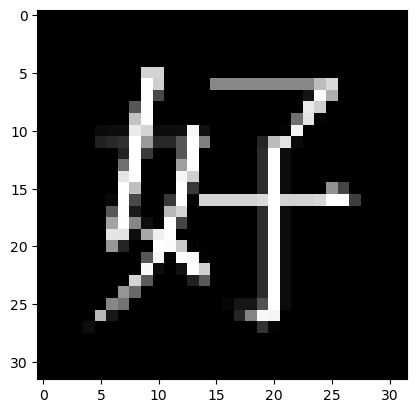

In [17]:
# i = 4019
i = images_t['label_dict']["好"]

char = images_t['chars'][i-1]

img_gray = images_t['protos'][i][0,0,:,:]

xs, ys = torch.where(img_gray >0)
x1,y1,x2,y2 = min(xs),min(ys), max(xs), max(ys)

area = float((x2-x1) * (y2 - y1))
area_all = len(img_gray.reshape(-1))
none_zero = len(xs)

complex_r = none_zero/area
complex_r2 = none_zero/area_all

print(char, complex_r, complex_r2)

plt.imshow(img_gray,cmap='gray');


In [19]:
from util.eval_res import MakaEval

f_path = "runtime/OSTR_C2J_DTA_Only_MTH/eval_res/TKHMTH2200_spindle_ori_TKHMTH2200__E16.pt"
maka_eval:MakaEval = torch.load(f_path)
print(maka_eval)


TS:25262 CR:0.9358 AR:0.9291 ACC:0.6618 L_ACC:0.9541603990182883 L_ins_N:1771 L_del_N:1321 L_sub_N:15577


In [ ]:
maka_eval.total_sub_cs

# '掲', '揭'





In [7]:
from datetime import datetime

s = '2025-09-25 08:13:14'
dt = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
dt.timestamp()



1758759194.0

In [5]:
# 1395864371200
# 1099511627776

a = 1024 * 1024 * 1024 * 1024 * 2
print(a)


2199023255552
